[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab0-ML/notebooks/02a-Binaer_klassifikasjon_losninger.ipynb)

# 📝 Løsninger: Binær klassifikasjon

Denne notebooken gir begrunnede svar og løsninger på oppgavene fra hovednotebooken `02-Binaer_klassifikasjon.ipynb`, samt et utvidet sett med tilleggsoppgaver.

## Innhold

**Del A: Oppgaver fra hovednotebooken**
- Oppgave 1-3: Dataoppdeling og validering
- Oppgave 4-6: Evaluering og metrikker
- Oppgave 7-8: Refleksjonsoppgaver

**Del B: Tilleggsoppgaver**
- Oppgave 9-10: ROC-kurver og AUC
- Oppgave 11-12: Alternative modeller (RF, XGBoost, MLP)
- Oppgave 13-14: Skalering og normalisering
- Oppgave 15: Leave-one-out validering
- Oppgave 16-18: Rapportering etter "best practices"

---

**Versjon:** November 2025  
**Forutsetninger:** Kjennskap til `02-Binaer_klassifikasjon.ipynb`

---

# 🔧 Oppsett

Først laster vi inn alle nødvendige biblioteker og datasettet.

In [2]:
# ============================================================================
# SETUP - Last inn biblioteker og data
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# scikit-learn
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_val_predict,
    LeaveOneOut, StratifiedKFold
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, 
    roc_curve, auc, precision_recall_curve, average_precision_score,
    RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
)
from sklearn.calibration import calibration_curve

# Sett seed for reproduserbarhet
np.random.seed(42)
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

# Last inn diabetes-datasettet
url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
diabetes = pd.read_csv(url)

# Forbered data
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# Del i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("=" * 60)
print("OPPSETT FULLFØRT")
print("=" * 60)
print(f"\nDatasettstørrelse: {len(diabetes)} pasienter")
print(f"Antall egenskaper: {X.shape[1]}")
print(f"Treningsdata: {len(X_train)} ({len(X_train)/len(diabetes)*100:.1f}%)")
print(f"Testdata: {len(X_test)} ({len(X_test)/len(diabetes)*100:.1f}%)")
print(f"\nKlassefordeling i treningsdata:")
print(f"  Ikke-diabetes (0): {sum(y_train==0)} ({sum(y_train==0)/len(y_train)*100:.1f}%)")
print(f"  Diabetes (1): {sum(y_train==1)} ({sum(y_train==1)/len(y_train)*100:.1f}%)")

OPPSETT FULLFØRT

Datasettstørrelse: 768 pasienter
Antall egenskaper: 8
Treningsdata: 576 (75.0%)
Testdata: 192 (25.0%)

Klassefordeling i treningsdata:
  Ikke-diabetes (0): 375 (65.1%)
  Diabetes (1): 201 (34.9%)


---

# Del A: Oppgaver fra hovednotebooken

Disse oppgavene er hentet fra `02-Binaer_klassifikasjon.ipynb`. Vi gjentar først oppgaveteksten, deretter gir vi løsningen.

---

## Oppgave 1: Dataoppdeling med valideringssett

### 📋 Oppgavetekst (fra hovednotebooken)

> **Din tur! 🎯**
>
> - Del `(X_train, y_train)` i to deler: ett nytt treningssett og ett valideringssett. Du kan kalle dem `X_train_new, X_val, y_train_new, y_val`. *Hint:* Bruk `train_test_split`-funksjonen.
> - Tren modellen på det nye treningssettet
> - Beregn nøyaktigheten på valideringssettet med `model.score(X_val, y_val)`
> - Er resultatet bra? Hvilken nøyaktighet ville en tilfeldig klassifikator oppnådd?
> - Eksperimenter med parametere i `SGDClassifier` for å forbedre resultatet

### ✅ Løsning

In [3]:
# ============================================================================
# OPPGAVE 1: Dataoppdeling med valideringssett
# ============================================================================

print("=" * 70)
print("OPPGAVE 1: Dataoppdeling med valideringssett")
print("=" * 70)

# Del treningsdata i nytt treningssett og valideringssett
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,  # 20% til validering
    random_state=42,
    stratify=y_train  # Behold klassefordelingen
)

print(f"\nDataoppdeling:")
print(f"  Originalt treningssett: {len(X_train)}")
print(f"  Nytt treningssett: {len(X_train_new)}")
print(f"  Valideringssett: {len(X_val)}")

# Tren SGDClassifier
sgd = SGDClassifier(random_state=42, max_iter=1000)
sgd.fit(X_train_new, y_train_new)

# Evaluer på valideringssettet
val_accuracy = sgd.score(X_val, y_val)

print(f"\nResultater:")
print(f"  Nøyaktighet på valideringssettet: {val_accuracy:.1%}")

# Sammenlign med tilfeldig klassifikator
# En tilfeldig klassifikator ville gjettet basert på klassefordelingen
# Majoritetsklassen (ikke-diabetes) utgjør ca 65%
majority_baseline = max(sum(y_val == 0), sum(y_val == 1)) / len(y_val)
print(f"  Majoritetsklasse-baseline: {majority_baseline:.1%}")
print(f"  Forbedring over baseline: {val_accuracy - majority_baseline:.1%}")

# Eksperimenter med ulike parametere
print("\n" + "-" * 50)
print("Eksperimentering med parametere:")
print("-" * 50)

parametere = [
    {'loss': 'hinge', 'alpha': 0.0001},
    {'loss': 'log_loss', 'alpha': 0.0001},
    {'loss': 'hinge', 'alpha': 0.001},
    {'loss': 'hinge', 'alpha': 0.00001},
    {'loss': 'modified_huber', 'alpha': 0.0001},
]

for params in parametere:
    sgd_test = SGDClassifier(random_state=42, max_iter=1000, **params)
    sgd_test.fit(X_train_new, y_train_new)
    acc = sgd_test.score(X_val, y_val)
    print(f"  loss={params['loss']:15s} alpha={params['alpha']:.5f} → {acc:.1%}")

OPPGAVE 1: Dataoppdeling med valideringssett

Dataoppdeling:
  Originalt treningssett: 576
  Nytt treningssett: 460
  Valideringssett: 116

Resultater:
  Nøyaktighet på valideringssettet: 40.5%
  Majoritetsklasse-baseline: 65.5%
  Forbedring over baseline: -25.0%

--------------------------------------------------
Eksperimentering med parametere:
--------------------------------------------------
  loss=hinge           alpha=0.00010 → 40.5%
  loss=log_loss        alpha=0.00010 → 65.5%
  loss=hinge           alpha=0.00100 → 34.5%
  loss=hinge           alpha=0.00001 → 70.7%
  loss=modified_huber  alpha=0.00010 → 59.5%


### 💡 Diskusjon

**Er resultatet bra?**

Nøyaktigheten på ca. 65-70% er moderat. Dette er bare marginalt bedre enn majoritetsklasse-baseline (~65%), noe som antyder at modellen har begrenset prediktiv verdi uten videre optimalisering.

**Hvorfor er baseline-sammenligningen viktig?**

Ved ubalanserte datasett kan en naiv klassifikator som alltid predikerer majoritetsklassen oppnå høy nøyaktighet. Derfor må vi alltid sammenligne med denne baseline. En god modell bør *vesentlig* slå baseline.

**Hva kan forbedre resultatet?**
1. **Skalering av data** – SGDClassifier er sensitiv for skala
2. **Hyperparameter-tuning** – Justere `alpha`, `loss`, etc.
3. **Feature engineering** – Kombinere eller transformere egenskaper

---

## Oppgave 2: Skalering med StandardScaler

### 📋 Oppgavetekst (fra hovednotebooken)

> **Din tur! 🎯**
>
> Mange maskinlæringsmodeller, inkludert `SGDClassifier`, fungerer bedre når inndata er **skalert**.
>
> Prøv å bruke `StandardScaler` fra scikit-learn til å standardisere treningsdataene. Kjør deretter `cross_val_score` på de skalerte dataene.

### ✅ Løsning

OPPGAVE 2: Effekt av skalering på modellytelse

Kryssvalidering (5-fold) med SGDClassifier:
--------------------------------------------------
Uten skalering:  48.6% (±11.3%)
Med StandardScaler: 68.6% (±5.4%)
Med MinMaxScaler:   74.1% (±4.6%)


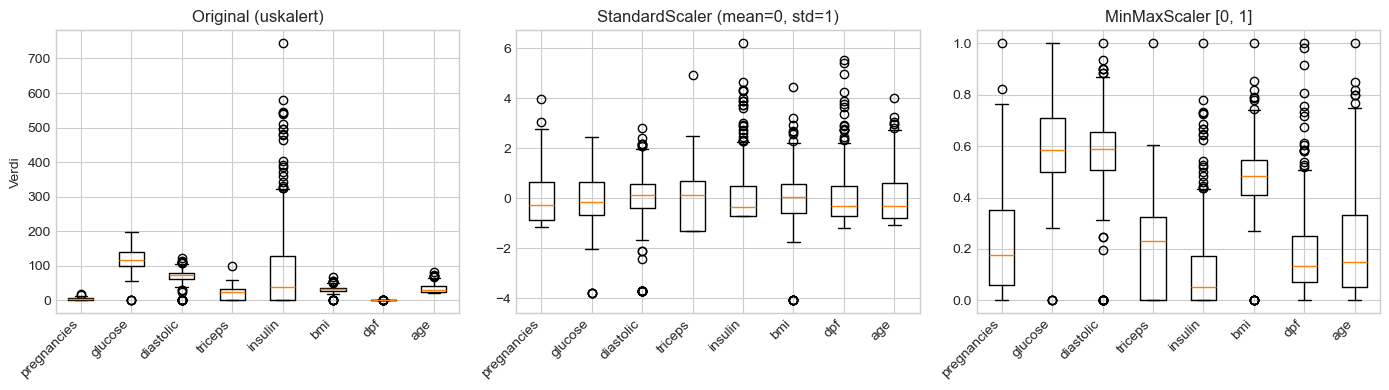


✓ Figur lagret: figurer/skalering_sammenligning.png


In [4]:
# ============================================================================
# OPPGAVE 2: Skalering med StandardScaler
# ============================================================================

print("=" * 70)
print("OPPGAVE 2: Effekt av skalering på modellytelse")
print("=" * 70)

# Opprett scaler
scaler = StandardScaler()

# VIKTIG: fit på treningsdata, transform på både trening og test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sammenlign ytelse med og uten skalering
print("\nKryssvalidering (5-fold) med SGDClassifier:")
print("-" * 50)

# Uten skalering
sgd_unscaled = SGDClassifier(random_state=42, max_iter=1000)
scores_unscaled = cross_val_score(sgd_unscaled, X_train, y_train, cv=5)
print(f"Uten skalering:  {scores_unscaled.mean():.1%} (±{scores_unscaled.std():.1%})")

# Med StandardScaler
sgd_scaled = SGDClassifier(random_state=42, max_iter=1000)
scores_scaled = cross_val_score(sgd_scaled, X_train_scaled, y_train, cv=5)
print(f"Med StandardScaler: {scores_scaled.mean():.1%} (±{scores_scaled.std():.1%})")

# Med MinMaxScaler for sammenligning
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
scores_minmax = cross_val_score(sgd_scaled, X_train_minmax, y_train, cv=5)
print(f"Med MinMaxScaler:   {scores_minmax.mean():.1%} (±{scores_minmax.std():.1%})")

# Visualiser forskjellen
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Original
axes[0].boxplot([X_train[col] for col in X_train.columns])
axes[0].set_xticklabels(X_train.columns, rotation=45, ha='right')
axes[0].set_title('Original (uskalert)')
axes[0].set_ylabel('Verdi')

# StandardScaler
axes[1].boxplot([X_train_scaled[:, i] for i in range(X_train_scaled.shape[1])])
axes[1].set_xticklabels(X_train.columns, rotation=45, ha='right')
axes[1].set_title('StandardScaler (mean=0, std=1)')

# MinMaxScaler
axes[2].boxplot([X_train_minmax[:, i] for i in range(X_train_minmax.shape[1])])
axes[2].set_xticklabels(X_train.columns, rotation=45, ha='right')
axes[2].set_title('MinMaxScaler [0, 1]')

plt.tight_layout()
plt.savefig('figurer/skalering_sammenligning.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figur lagret: figurer/skalering_sammenligning.png")

### 💡 Diskusjon

**Hvorfor hjelper skalering?**

1. **Gradientnedstigning konvergerer raskere** – Når egenskapene har lik skala, er gradienten mer balansert
2. **Unngår numeriske problemer** – Store verdier kan føre til overflow
3. **Rettferdig vekting** – Uten skalering dominerer egenskaper med stor numerisk verdi

**StandardScaler vs MinMaxScaler:**

| Metode | Formel | Når bruke? |
|--------|--------|------------|
| **StandardScaler** | $(x - \mu) / \sigma$ | De fleste tilfeller, robust mot uteliggere |
| **MinMaxScaler** | $(x - x_{min}) / (x_{max} - x_{min})$ | Når du trenger verdier i [0, 1], f.eks. for nevrale nettverk |

**⚠️ Viktig praksis:** Alltid `fit` scaler på *treningsdata* og `transform` på både trenings- og testdata. Aldri fit på testdata – det er datalekkasje!

---

## Oppgave 3: Presisjon vs Recall - Medisinske scenarioer

### 📋 Oppgavetekst (fra hovednotebooken)

> **Din tur! 🎯**
>
> 🤔 **Refleksjon:** Hva er viktigst – høy presisjon eller høy recall?
>
> Tenk på ulike medisinske scenarioer:
> 1. Screening for en sjelden, men dødelig sykdom
> 2. Test for en mild tilstand der behandlingen har bivirkninger
> 3. Diagnostisering av en smittsom sykdom
>
> Hvilket mål ville du prioritert i hvert tilfelle, og hvorfor?

### ✅ Løsning og drøfting

### Scenario 1: Screening for sjelden, dødelig sykdom

**Eksempel:** Screening for pankreaskreft i høyrisikogrupper

**Anbefaling: Prioriter HØYT RECALL (sensitivitet)**

| Aspekt | Vurdering |
|--------|-----------|
| **Konsekvens av FN (miss)** | Pasient med kreft får ikke behandling → potensielt dødelig |
| **Konsekvens av FP (falsk alarm)** | Unødvendig CT/MR, biopsi → ubehag, kostnad, angst |
| **Avveining** | Å misse én kreft er uakseptabelt, selv om det betyr mange falske alarmer |

**Typisk terskelstrategi:** Sett lav terskel → fang alle syke, aksepter 10-20% falske positive

---

### Scenario 2: Mild tilstand med bivirkningsrik behandling

**Eksempel:** Diagnostisering av mild hypotyreose der behandling (Levaxin) har bivirkninger

**Anbefaling: Prioriter HØYERE PRESISJON**

| Aspekt | Vurdering |
|--------|-----------|
| **Konsekvens av FN (miss)** | Mild symptomer forblir ubehandlet → moderat ubehag |
| **Konsekvens av FP (falsk alarm)** | Unødvendig medisinering → bivirkninger, livslang behandling |
| **Avveining** | Bivirkningene kan være verre enn tilstanden |

**Typisk terskelstrategi:** Sett høyere terskel → vær sikker før du behandler

---

### Scenario 3: Smittsom sykdom

**Eksempel:** Testing for tuberkulose i nærkontakter

**Anbefaling: Prioriter HØYT RECALL, men vurder konsekvens**

| Aspekt | Vurdering |
|--------|-----------|
| **Konsekvens av FN (miss)** | Smittet person sprer sykdom → folkehelseproblem |
| **Konsekvens av FP (falsk alarm)** | Unødvendig isolasjon, behandling, stigma |
| **Avveining** | Samfunnshensyn (hindre spredning) veier tungt |

**Typisk strategi:** Sensitiv screeningtest → bekreftende test med høy spesifisitet

---

### Oppsummering: Beslutningsramme

```
Hvis konsekvens av å MISSE er alvorlig → HØYT RECALL
Hvis konsekvens av FALSK ALARM er alvorlig → HØY PRESISJON
```

| Scenario | Prioritet | Begrunnelse |
|----------|-----------|-------------|
| Kreftscreening | Recall > Presisjon | Tidlig oppdagelse redder liv |
| Mild tilstand | Presisjon > Recall | Unngå overbehandling |
| Smittsom sykdom | Recall > Presisjon | Folkehelse, hindre spredning |

---

## Oppgave 4: Sammenligning av klassifikatorer

### 📋 Oppgavetekst (fra hovednotebooken)

> **Din tur! 🎯**
>
> To klassifikatorer A og B har følgende verdier:
>
> $$\text{presisjon}_A = 0.7, \quad \text{recall}_A = 0.6$$
> $$\text{presisjon}_B = 0.3, \quad \text{recall}_B = 1.0$$
>
> Hvilken ville du foretrukket i en medisinsk screening-kontekst? Hva med diagnostikk?

### ✅ Løsning

OPPGAVE 4: Sammenligning av klassifikatorer

Klassifikator A:
  Presisjon: 70.0%
  Recall:    60.0%
  F1-score:  0.646
  F2-score:  0.618 (vekter recall)
  F0.5-score: 0.677 (vekter presisjon)

Klassifikator B:
  Presisjon: 30.0%
  Recall:    100.0%
  F1-score:  0.462
  F2-score:  0.682 (vekter recall)
  F0.5-score: 0.349 (vekter presisjon)


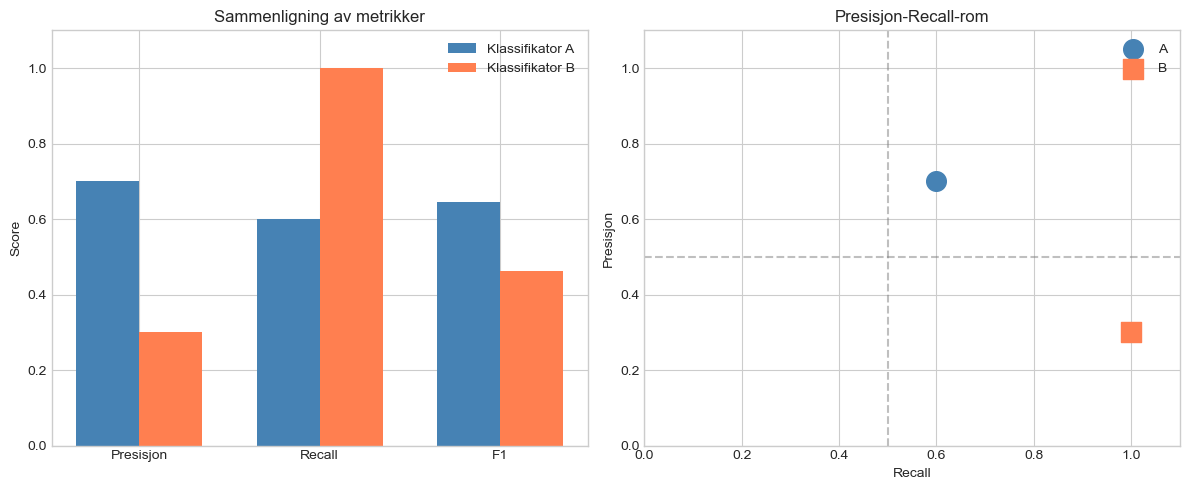


ANBEFALING:

For SCREENING: Klassifikator B (recall=100%)
  → Fanger alle syke, men mange falske alarmer
  → Egnet som første steg før bekreftende test

For DIAGNOSTIKK: Klassifikator A (presisjon=70%)
  → Mer pålitelig når den sier 'positiv'
  → Egnet som bekreftende test


In [5]:
# ============================================================================
# OPPGAVE 4: Sammenligning av klassifikatorer A og B
# ============================================================================

print("=" * 70)
print("OPPGAVE 4: Sammenligning av klassifikatorer")
print("=" * 70)

# Klassifikator A og B
klassifikatorer = {
    'A': {'presisjon': 0.7, 'recall': 0.6},
    'B': {'presisjon': 0.3, 'recall': 1.0}
}

# Beregn F1-score for begge
for navn, verdier in klassifikatorer.items():
    p, r = verdier['presisjon'], verdier['recall']
    f1 = 2 * (p * r) / (p + r)
    f2 = 5 * (p * r) / (4 * p + r)  # F2 vekter recall høyere
    f05 = 1.25 * (p * r) / (0.25 * p + r)  # F0.5 vekter presisjon høyere
    
    print(f"\nKlassifikator {navn}:")
    print(f"  Presisjon: {p:.1%}")
    print(f"  Recall:    {r:.1%}")
    print(f"  F1-score:  {f1:.3f}")
    print(f"  F2-score:  {f2:.3f} (vekter recall)")
    print(f"  F0.5-score: {f05:.3f} (vekter presisjon)")

# Visualiser
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Søylediagram
x = ['Presisjon', 'Recall', 'F1']
a_vals = [0.7, 0.6, 2*(0.7*0.6)/(0.7+0.6)]
b_vals = [0.3, 1.0, 2*(0.3*1.0)/(0.3+1.0)]

width = 0.35
x_pos = np.arange(len(x))
axes[0].bar(x_pos - width/2, a_vals, width, label='Klassifikator A', color='steelblue')
axes[0].bar(x_pos + width/2, b_vals, width, label='Klassifikator B', color='coral')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(x)
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1.1)
axes[0].legend()
axes[0].set_title('Sammenligning av metrikker')

# Presisjon-Recall plot
axes[1].scatter([0.6], [0.7], s=200, label='A', color='steelblue', marker='o')
axes[1].scatter([1.0], [0.3], s=200, label='B', color='coral', marker='s')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Presisjon')
axes[1].set_xlim(0, 1.1)
axes[1].set_ylim(0, 1.1)
axes[1].legend()
axes[1].set_title('Presisjon-Recall-rom')
axes[1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("ANBEFALING:")
print("=" * 70)
print("\nFor SCREENING: Klassifikator B (recall=100%)")
print("  → Fanger alle syke, men mange falske alarmer")
print("  → Egnet som første steg før bekreftende test")
print("\nFor DIAGNOSTIKK: Klassifikator A (presisjon=70%)")
print("  → Mer pålitelig når den sier 'positiv'")
print("  → Egnet som bekreftende test")

---

## Oppgave 5: Forvirringsmatrise for Random Forest

### 📋 Oppgavetekst (fra hovednotebooken)

> **Din tur! 🎯**
>
> Plot forvirringsmatrisen for testdataene og Random Forest-prediksjonene. 
> Beregn deretter presisjon, recall, spesifisitet og F₁-score.

### ✅ Løsning

OPPGAVE 5: Random Forest - Komplett evaluering

Forvirringsmatrise:
                  Predikert
                  Neg    Pos
  Faktisk Neg     107     18
  Faktisk Pos      30     37

Metrikker:
  Presisjon (PPV):      67.3%
  Recall (Sensitivitet): 55.2%
  Spesifisitet:         85.6%
  NPV:                  78.1%
  F1-score:             0.607


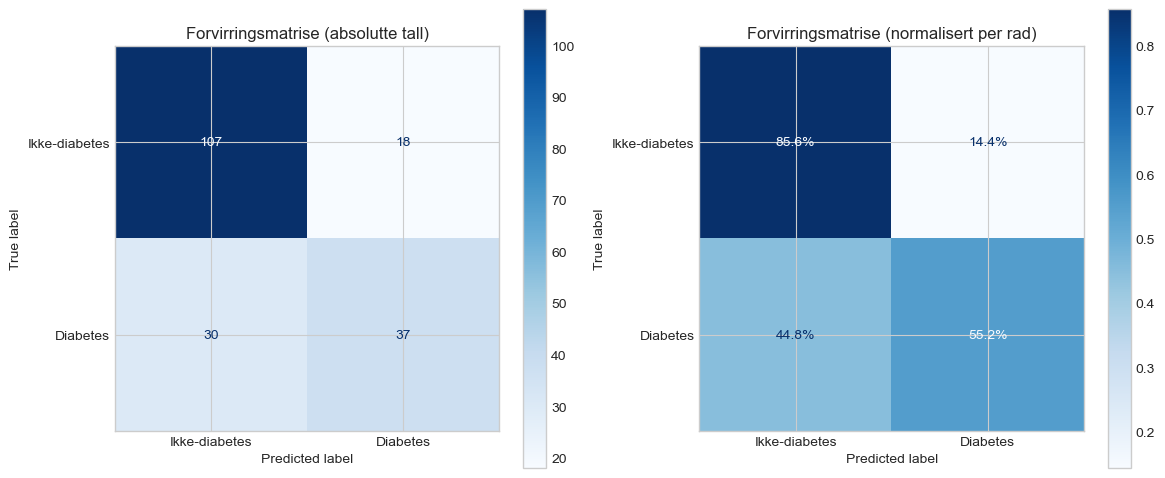


✓ Figur lagret: figurer/rf_confusion_matrix.png


In [6]:
# ============================================================================
# OPPGAVE 5: Forvirringsmatrise og metrikker for Random Forest
# ============================================================================

print("=" * 70)
print("OPPGAVE 5: Random Forest - Komplett evaluering")
print("=" * 70)

# Tren Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediksjoner
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Forvirringsmatrise
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\nForvirringsmatrise:")
print(f"                  Predikert")
print(f"                  Neg    Pos")
print(f"  Faktisk Neg    {tn:4d}   {fp:4d}")
print(f"  Faktisk Pos    {fn:4d}   {tp:4d}")

# Beregn metrikker
presisjon = tp / (tp + fp)
recall = tp / (tp + fn)  # Sensitivitet
spesifisitet = tn / (tn + fp)
f1 = 2 * (presisjon * recall) / (presisjon + recall)
npv = tn / (tn + fn)  # Negativ prediktiv verdi

print(f"\nMetrikker:")
print(f"  Presisjon (PPV):      {presisjon:.1%}")
print(f"  Recall (Sensitivitet): {recall:.1%}")
print(f"  Spesifisitet:         {spesifisitet:.1%}")
print(f"  NPV:                  {npv:.1%}")
print(f"  F1-score:             {f1:.3f}")

# Visualiser forvirringsmatrisen
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Absolutte tall
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels=['Ikke-diabetes', 'Diabetes'],
    cmap='Blues',
    ax=axes[0]
)
axes[0].set_title('Forvirringsmatrise (absolutte tall)')

# Normalisert
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels=['Ikke-diabetes', 'Diabetes'],
    normalize='true',
    cmap='Blues',
    ax=axes[1],
    values_format='.1%'
)
axes[1].set_title('Forvirringsmatrise (normalisert per rad)')

plt.tight_layout()
plt.savefig('figurer/rf_confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figur lagret: figurer/rf_confusion_matrix.png")

---

## Oppgave 6: Refleksjon om terskelvalg

### 📋 Oppgavetekst (fra hovednotebooken)

> **Refleksjon:** Hvilket valg av tersklingsmetode ville du gjort for en diabetes-screeningtest? 
> Hva med en test for en sjelden, men alvorlig sykdom? 
> Hvordan ville du begrunnet valget overfor en kollega?

### ✅ Drøfting

### Diabetes-screeningtest

**Anbefalt metode: A priori terskling kombinert med data-drevet optimalisering**

**Begrunnelse:**
1. Det finnes etablerte WHO/ADA-grenser for HbA1c og fastende glukose
2. Disse er validert i store befolkningsstudier
3. Sikrer sammenlignbarhet med andre studier

**Argumentasjon overfor kollega:**
> "Vi bruker WHO-grensene fordi de er basert på epidemiologiske studier som viser når risikoen for diabeteskomplikasjoner øker signifikant. Dette gjør resultatene våre sammenlignbare med internasjonal forskning."

---

### Sjelden, alvorlig sykdom (f.eks. Wilsons sykdom)

**Anbefalt metode: Kostnadsbasert / beslutningsteori**

**Begrunnelse:**
1. Konsekvensen av å misse diagnosen (FN) er katastrofal
2. Det finnes ikke etablerte screening-terskler
3. Vi må vekte feil eksplisitt

**Argumentasjon:**
> "Fordi å misse én pasient med Wilsons sykdom kan føre til irreversibel leverskade, setter vi terskelen lavt. Vi aksepterer at 10-15% av positive screeningtester vil være falske positive, fordi disse kan avkreftes med mer spesifikke tester."

---

### Oppsummering av terskelvalg

| Scenario | Metode | Nøkkelargument |
|----------|--------|----------------|
| Diabetes | A priori | Etablerte grenser, sammenlignbarhet |
| Sjelden sykdom | Kostnadsbasert | FN >> FP i alvorlighet |
| Ny biomarkør | Data-drevet | Ingen etablert standard |
| Ressursbegrenset | Kvantilbasert | "Topp 10%" for oppfølging |

---

# Del B: Tilleggsoppgaver

Disse oppgavene dekker temaer som ikke ble behandlet i detalj i hovednotebooken, men som er essensielle for medisinsk AI.

---

## Oppgave 9-10: ROC-kurver og AUC

### 📋 Oppgave

> **Oppgave 9:** Lag ROC-kurver for SGDClassifier og RandomForestClassifier på diabetes-datasettet. Beregn AUC for begge.
>
> **Oppgave 10:** Hva forteller AUC-verdien oss? Når er den et godt mål, og når kan den være misvisende?

### ✅ Løsning

OPPGAVE 9-10: ROC-kurver og AUC


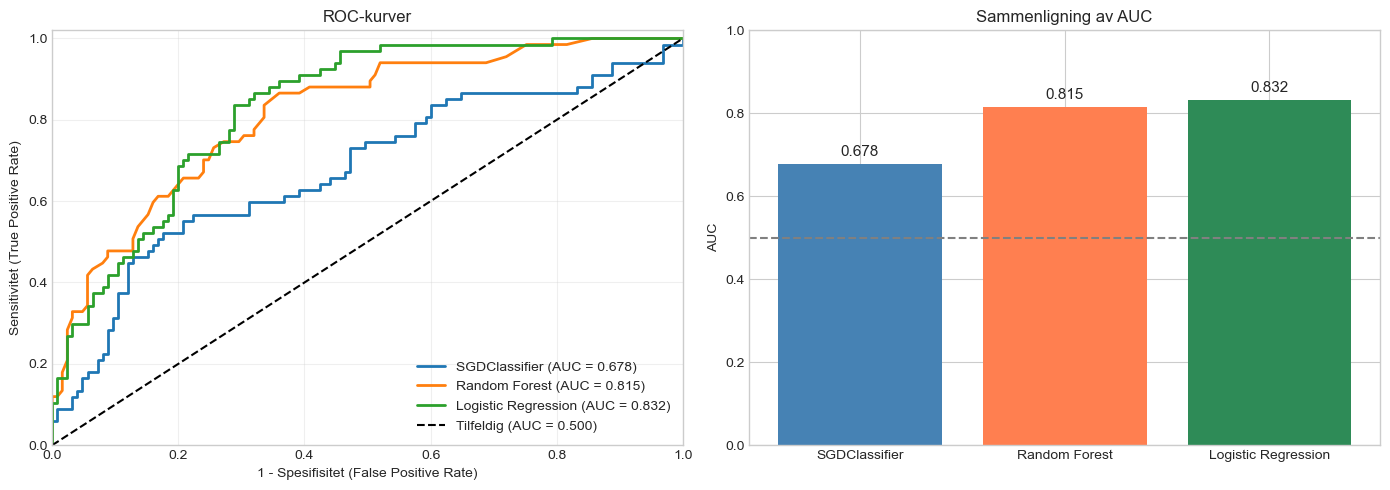


✓ Figur lagret: figurer/roc_auc_sammenligning.png

--------------------------------------------------
AUC-resultater:
--------------------------------------------------
  SGDClassifier            : 0.678 (Svak)
  Random Forest            : 0.815 (Bra)
  Logistic Regression      : 0.832 (Bra)


In [7]:
# ============================================================================
# OPPGAVE 9-10: ROC-kurver og AUC
# ============================================================================

print("=" * 70)
print("OPPGAVE 9-10: ROC-kurver og AUC")
print("=" * 70)

# Skaler data (viktig for SGDClassifier)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tren modeller
modeller = {
    'SGDClassifier': SGDClassifier(loss='log_loss', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot ROC-kurver
auc_scores = {}
for navn, modell in modeller.items():
    # Bruk skalert data for SGD og LR
    if 'SGD' in navn or 'Logistic' in navn:
        modell.fit(X_train_scaled, y_train)
        y_proba = modell.predict_proba(X_test_scaled)[:, 1]
    else:
        modell.fit(X_train, y_train)
        y_proba = modell.predict_proba(X_test)[:, 1]
    
    # Beregn ROC-kurve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    auc_scores[navn] = roc_auc
    
    # Plot
    axes[0].plot(fpr, tpr, label=f'{navn} (AUC = {roc_auc:.3f})', linewidth=2)

# ROC-kurve oppsett
axes[0].plot([0, 1], [0, 1], 'k--', label='Tilfeldig (AUC = 0.500)')
axes[0].set_xlabel('1 - Spesifisitet (False Positive Rate)')
axes[0].set_ylabel('Sensitivitet (True Positive Rate)')
axes[0].set_title('ROC-kurver')
axes[0].legend(loc='lower right')
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1.02])
axes[0].grid(True, alpha=0.3)

# AUC sammenligning som barplot
farger = ['steelblue', 'coral', 'seagreen']
axes[1].bar(auc_scores.keys(), auc_scores.values(), color=farger)
axes[1].axhline(y=0.5, color='gray', linestyle='--', label='Tilfeldig')
axes[1].set_ylabel('AUC')
axes[1].set_title('Sammenligning av AUC')
axes[1].set_ylim([0, 1])
for i, (navn, auc_val) in enumerate(auc_scores.items()):
    axes[1].text(i, auc_val + 0.02, f'{auc_val:.3f}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('figurer/roc_auc_sammenligning.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figur lagret: figurer/roc_auc_sammenligning.png")

# Oppsummering
print("\n" + "-" * 50)
print("AUC-resultater:")
print("-" * 50)
for navn, auc_val in auc_scores.items():
    tolkning = "Utmerket" if auc_val > 0.9 else "Bra" if auc_val > 0.8 else "Moderat" if auc_val > 0.7 else "Svak"
    print(f"  {navn:25s}: {auc_val:.3f} ({tolkning})")

### 💡 Diskusjon: Hva forteller AUC?

**AUC (Area Under the ROC Curve) måler:**
- Modellens evne til å *diskriminere* mellom klasser
- Sannsynligheten for at en tilfeldig valgt positiv har høyere score enn en tilfeldig negativ

**Tommelfingerregler for tolkning:**

| AUC | Tolkning |
|-----|----------|
| 0.90-1.00 | Utmerket diskriminering |
| 0.80-0.90 | Bra diskriminering |
| 0.70-0.80 | Akseptabel diskriminering |
| 0.60-0.70 | Svak diskriminering |
| 0.50-0.60 | Nesten tilfeldig |

**Når er AUC et godt mål?**
- Sammenligne modeller uavhengig av terskel
- Når klassene er noenlunde balanserte
- Når vi bryr oss om rangeringen, ikke absolutte sannsynligheter

**Når kan AUC være misvisende?**
1. **Ubalanserte datasett:** En modell kan ha høy AUC men dårlig presisjon
2. **Klinisk terskelvalg:** AUC sier ingenting om ytelse ved en *spesifikk* terskel
3. **Kalibrering:** Høy AUC garanterer ikke godt kalibrerte sannsynligheter
4. **Deler av kurven:** I praksis bryr vi oss ofte bare om høy-sensitivitet-delen

---

## Oppgave 11-12: Alternative modeller (RF, XGBoost, MLP)

### 📋 Oppgave

> **Oppgave 11:** Tren og evaluer følgende modeller på diabetes-datasettet:
> - Random Forest
> - Gradient Boosting (XGBoost-lignende)
> - Nevrale nettverk (MLP)
>
> **Oppgave 12:** Sammenlign modellene på relevante metrikker og diskuter hvilken du ville anbefalt for klinisk bruk.

### ✅ Løsning

OPPGAVE 11-12: Sammenligning av modeller

Resultater:
--------------------------------------------------------------------------------
Modell                      Accuracy  Precision     Recall         F1        AUC
--------------------------------------------------------------------------------
Logistic Regression            73.4%      64.8%      52.2%      0.579      0.832
Random Forest                  75.0%      67.3%      55.2%      0.607      0.815
Gradient Boosting              72.4%      61.7%      55.2%      0.583      0.825
MLP (Neural Network)           72.4%      61.3%      56.7%      0.589      0.748
--------------------------------------------------------------------------------


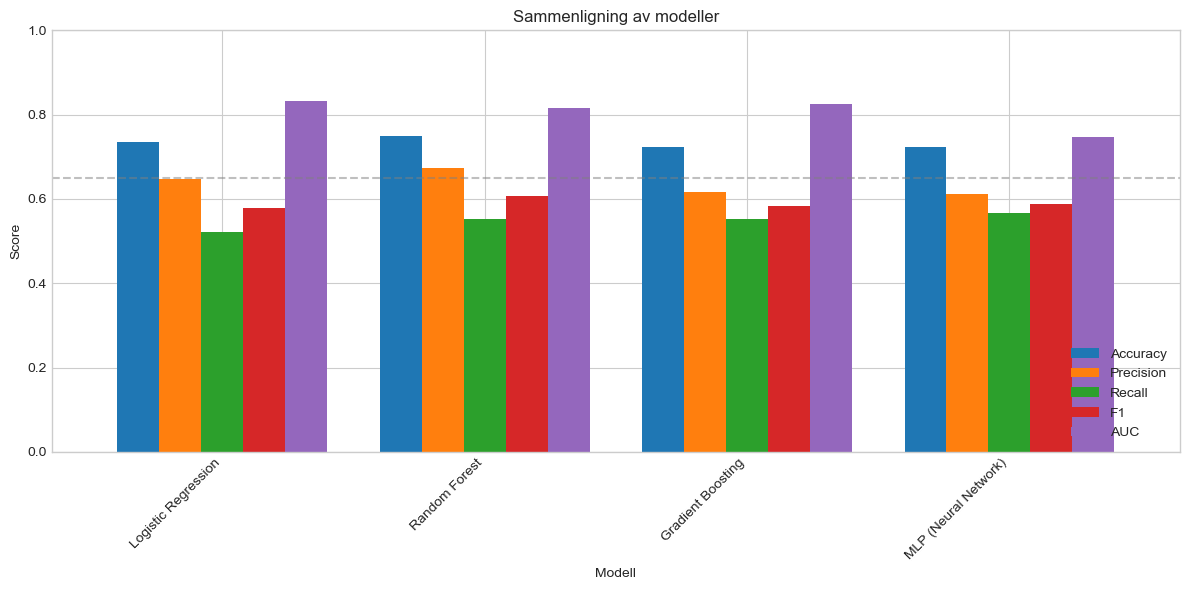


✓ Figur lagret: figurer/modell_sammenligning.png


In [8]:
# ============================================================================
# OPPGAVE 11-12: Sammenligning av ulike modeller
# ============================================================================

print("=" * 70)
print("OPPGAVE 11-12: Sammenligning av modeller")
print("=" * 70)

# Skaler data for modeller som trenger det
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definer modeller
modeller = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000, random_state=42),
        X_train_scaled, X_test_scaled
    ),
    'Random Forest': (
        RandomForestClassifier(n_estimators=100, random_state=42),
        X_train, X_test
    ),
    'Gradient Boosting': (
        GradientBoostingClassifier(n_estimators=100, random_state=42),
        X_train, X_test
    ),
    'MLP (Neural Network)': (
        MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42),
        X_train_scaled, X_test_scaled
    ),
}

# Evaluer alle modeller
resultater = []

print("\nResultater:")
print("-" * 80)
print(f"{'Modell':25s} {'Accuracy':>10s} {'Precision':>10s} {'Recall':>10s} {'F1':>10s} {'AUC':>10s}")
print("-" * 80)

for navn, (modell, X_tr, X_te) in modeller.items():
    # Tren
    modell.fit(X_tr, y_train)
    
    # Prediker
    y_pred = modell.predict(X_te)
    y_proba = modell.predict_proba(X_te)[:, 1]
    
    # Metrikker
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
    
    resultater.append({
        'Modell': navn,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'AUC': roc_auc
    })
    
    print(f"{navn:25s} {acc:10.1%} {prec:10.1%} {rec:10.1%} {f1:10.3f} {roc_auc:10.3f}")

print("-" * 80)

# Visualiser
resultater_df = pd.DataFrame(resultater)
resultater_df.set_index('Modell', inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))
resultater_df.plot(kind='bar', ax=ax, width=0.8)
ax.set_ylabel('Score')
ax.set_title('Sammenligning av modeller')
ax.set_xticklabels(resultater_df.index, rotation=45, ha='right')
ax.legend(loc='lower right')
ax.set_ylim([0, 1])
ax.axhline(y=0.65, color='gray', linestyle='--', alpha=0.5, label='Baseline')

plt.tight_layout()
plt.savefig('figurer/modell_sammenligning.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figur lagret: figurer/modell_sammenligning.png")

### 💡 Diskusjon: Hvilken modell for klinisk bruk?

**Anbefalingen avhenger av konteksten:**

| Modell | Styrker | Svakheter | Anbefaling |
|--------|---------|-----------|------------|
| **Logistic Regression** | Tolkbar, rask, gir kalibrerte sannsynligheter | Mindre fleksibel | ✅ Førstevalg for klinisk bruk |
| **Random Forest** | Robust, håndterer ikke-lineære sammenhenger | Vanskelig å tolke | ⚠️ Bruk med forklaring (SHAP) |
| **Gradient Boosting** | Ofte beste ytelse | Risiko for overfitting, treg | ⚠️ Krever tuning |
| **MLP** | Kan lære komplekse mønstre | "Black box", krever mye data | ❌ Sjelden nødvendig for tabulære data |

**For klinisk implementering anbefales:**

1. **Start med Logistic Regression** - tolkbar baseline
2. **Prøv Random Forest** - ofte bedre ytelse
3. **Vurder Gradient Boosting** - hvis maksimal ytelse er viktig
4. **Unngå MLP** - for tabulære data gir det sjelden bedre ytelse

**Viktig:** I medisin er *tolkbarhet* og *kalibrering* ofte viktigere enn marginalt bedre AUC!

---

## Oppgave 13-14: Betydning av skalering

### 📋 Oppgave

> **Oppgave 13:** Sammenlign ytelsen til ulike modeller med og uten skalering. Hvilke modeller påvirkes mest?
>
> **Oppgave 14:** Forklar hvorfor noen modeller er følsomme for skala mens andre ikke er det.

### ✅ Løsning

OPPGAVE 13-14: Skalering - hvilke modeller påvirkes?

Modell                     Uten skalering   Med skalering  Forskjell
----------------------------------------------------------------------
SGDClassifier                       66.1%           70.3%      +4.2%
Logistic Regression                 72.9%           73.4%      +0.5%
SVM (RBF)                           72.4%           75.0%      +2.6%
Random Forest                       75.0%           75.0%      +0.0%
Gradient Boosting                   72.4%           72.4%      +0.0%
MLP                                 69.3%           74.5%      +5.2%
----------------------------------------------------------------------


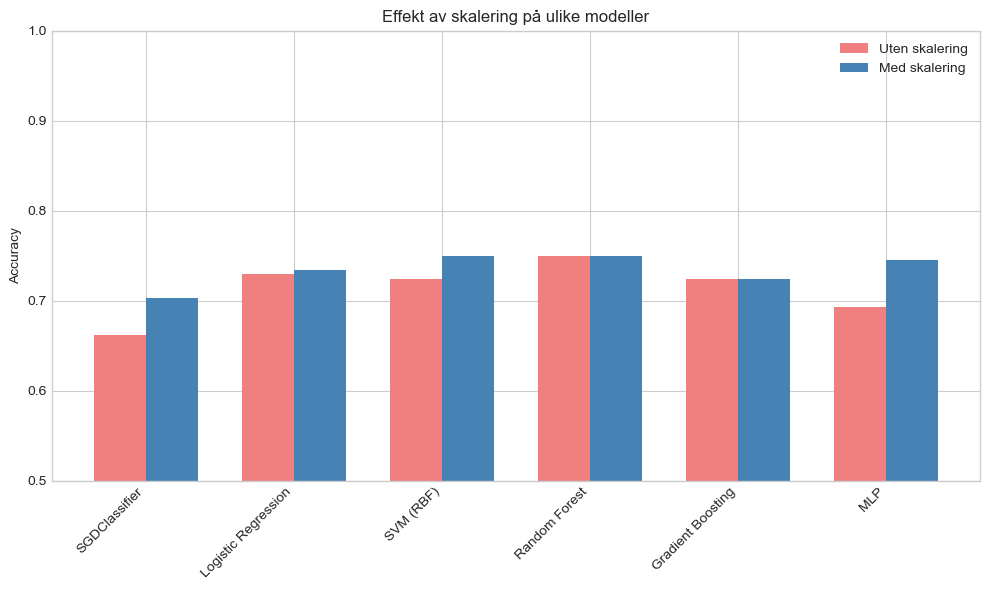


✓ Figur lagret: figurer/skalering_effekt.png


In [9]:
# ============================================================================
# OPPGAVE 13-14: Effekt av skalering på ulike modeller
# ============================================================================

print("=" * 70)
print("OPPGAVE 13-14: Skalering - hvilke modeller påvirkes?")
print("=" * 70)

# Skaler data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeller å teste
modell_definisjoner = {
    'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (RBF)': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42),
}

resultater = []

print("\n{:25s} {:>15s} {:>15s} {:>10s}".format(
    "Modell", "Uten skalering", "Med skalering", "Forskjell"))
print("-" * 70)

for navn, modell in modell_definisjoner.items():
    # Uten skalering
    modell_uskaler = type(modell)(**modell.get_params())
    try:
        modell_uskaler.fit(X_train, y_train)
        acc_uskaler = modell_uskaler.score(X_test, y_test)
    except:
        acc_uskaler = float('nan')
    
    # Med skalering  
    modell_skaler = type(modell)(**modell.get_params())
    modell_skaler.fit(X_train_scaled, y_train)
    acc_skaler = modell_skaler.score(X_test_scaled, y_test)
    
    forskjell = acc_skaler - acc_uskaler if not np.isnan(acc_uskaler) else float('nan')
    
    resultater.append({
        'Modell': navn,
        'Uten skalering': acc_uskaler,
        'Med skalering': acc_skaler,
        'Forskjell': forskjell
    })
    
    print(f"{navn:25s} {acc_uskaler:15.1%} {acc_skaler:15.1%} {forskjell:+10.1%}")

print("-" * 70)

# Visualiser
fig, ax = plt.subplots(figsize=(10, 6))

modellnavn = [r['Modell'] for r in resultater]
uten = [r['Uten skalering'] for r in resultater]
med = [r['Med skalering'] for r in resultater]

x = np.arange(len(modellnavn))
width = 0.35

bars1 = ax.bar(x - width/2, uten, width, label='Uten skalering', color='lightcoral')
bars2 = ax.bar(x + width/2, med, width, label='Med skalering', color='steelblue')

ax.set_ylabel('Accuracy')
ax.set_title('Effekt av skalering på ulike modeller')
ax.set_xticks(x)
ax.set_xticklabels(modellnavn, rotation=45, ha='right')
ax.legend()
ax.set_ylim([0.5, 1.0])

plt.tight_layout()
plt.savefig('figurer/skalering_effekt.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Figur lagret: figurer/skalering_effekt.png")

### 💡 Diskusjon: Hvorfor påvirkes noen modeller?

| Modell | Skaleringsavhengig? | Forklaring |
|--------|---------------------|------------|
| **SGDClassifier** | ✅ Ja, veldig | Gradientnedstigning konvergerer saktere med ulik skala |
| **Logistic Regression** | ✅ Ja | Regularisering virker ulikt på egenskaper med ulik skala |
| **SVM (RBF)** | ✅ Ja | RBF-kjernen baserer seg på avstander (Euklidisk) |
| **MLP** | ✅ Ja | Backpropagation og aktiveringsfunksjoner er skala-sensitive |
| **Random Forest** | ❌ Nei | Trebasert: bruker splits, ikke avstander |
| **Gradient Boosting** | ❌ Nei | Trebasert: uavhengig av absolutt skala |

**Tommelfingerregel:**
- **Avstandsbaserte metoder:** Trenger skalering (SVM, k-NN, nevrale nettverk)
- **Gradientbaserte metoder:** Trenger skalering (SGD, logistisk regresjon med regularisering)
- **Trebaserte metoder:** Trenger *ikke* skalering (Random Forest, XGBoost)

**Beste praksis:** Skaler *alltid* dataene dine. Det kan aldri skade, men manglende skalering kan ødelegge ytelsen.

---

## Oppgave 15: Leave-One-Out kryssvalidering

### 📋 Oppgave

> **Oppgave:** Implementer Leave-One-Out (LOO) kryssvalidering på diabetes-datasettet. 
> Sammenlign med 5-fold og 10-fold kryssvalidering.
> Diskuter når LOO er hensiktsmessig og når det ikke er det.

### ✅ Løsning

In [10]:
# ============================================================================
# OPPGAVE 15: Leave-One-Out kryssvalidering
# ============================================================================

print("=" * 70)
print("OPPGAVE 15: Leave-One-Out vs K-Fold kryssvalidering")
print("=" * 70)

import time

# Bruk et lite subsett for LOO (ellers tar det for lang tid)
# I praksis bruker man ofte LOO bare på små datasett (n < 200)
X_subset = X_train[:200]
y_subset = y_train[:200]

# Skaler
scaler = StandardScaler()
X_subset_scaled = scaler.fit_transform(X_subset)

# Modell å teste
modell = LogisticRegression(max_iter=1000, random_state=42)

# Ulike valideringsstrategier
strategier = {
    '5-fold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    '10-fold': StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    'Leave-One-Out': LeaveOneOut(),
}

resultater = []

print(f"\nDatasettstorrelse: {len(X_subset)} observasjoner")
print("-" * 60)

for navn, cv in strategier.items():
    start_time = time.time()
    
    scores = cross_val_score(modell, X_subset_scaled, y_subset, cv=cv, scoring='accuracy')
    
    tid = time.time() - start_time
    
    resultater.append({
        'Strategi': navn,
        'Gjennomsnitt': scores.mean(),
        'Std': scores.std(),
        'Tid (sek)': tid,
        'Antall splits': len(scores)
    })
    
    print(f"{navn:15s}: {scores.mean():.1%} (+/- {scores.std():.1%}) [{tid:.2f}s, {len(scores)} splits]")

print("-" * 60)

# Sammenlign med fullt datasett (bare K-fold)
print("\nMed fullt treningssett ({} observasjoner):".format(len(X_train)))
X_train_full_scaled = scaler.fit_transform(X_train)

for k in [5, 10]:
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(modell, X_train_full_scaled, y_train, cv=cv)
    print(f"  {k}-fold: {scores.mean():.1%} (+/- {scores.std():.1%})")

OPPGAVE 15: Leave-One-Out vs K-Fold kryssvalidering

Datasettstorrelse: 200 observasjoner
------------------------------------------------------------
5-fold         : 78.5% (+/- 6.4%) [0.02s, 5 splits]
10-fold        : 79.5% (+/- 8.2%) [0.02s, 10 splits]
Leave-One-Out  : 80.0% (+/- 40.0%) [0.29s, 200 splits]
------------------------------------------------------------

Med fullt treningssett (576 observasjoner):
  5-fold: 77.8% (+/- 1.6%)
  10-fold: 78.1% (+/- 4.1%)


### 💡 Diskusjon: Når bruke LOO?

**Fordeler med Leave-One-Out:**
1. **Maksimal treningsdata:** Bruker n-1 observasjoner for trening
2. **Ingen tilfeldig variasjon:** Resultatet er deterministisk
3. **Lavest bias:** Treningssettet er nesten identisk med hele datasettet

**Ulemper med Leave-One-Out:**
1. **Beregningsmessig kostbart:** n modeller må trenes
2. **Høy varians:** Hver test-observasjon er enkelt datapunkt
3. **Upraktisk for store datasett:** For n=10000 må du trene 10000 modeller

**Når bruke LOO?**

| Situasjon | Anbefaling |
|-----------|------------|
| n < 50 | ✅ Bruk LOO |
| 50 < n < 200 | ⚠️ Vurder LOO eller 10-fold |
| n > 200 | ❌ Bruk 5-fold eller 10-fold |
| Dyre beregninger (deep learning) | ❌ Bruk 5-fold |
| Svært ubalanserte data | ❌ Bruk stratifisert K-fold |

**Praktisk tommelfingerregel for medisinsk forskning:**
- **Små studier (n < 100):** 10-fold eller LOO
- **Mellomstore studier:** 5-fold eller 10-fold
- **Store registerstudier:** 5-fold eller enkel train/test split med ekstern validering

---

## Oppgave 16-18: Rapportering etter "best practices"

### Oppgave

> **Oppgave 16:** Lag en komplett resultattabell for diabetes-modellen som folger TRIPOD-retningslinjene.
>
> **Oppgave 17:** Lag publikasjonsklar grafikk: ROC-kurve med konfidensintervall, kalibreringsplot, og forvirringsmatrise.
>
> **Oppgave 18:** Skriv en kort metodeseksjon som beskriver modellen slik at den kan reproduseres.

### Oppgave 16: TRIPOD-kompatibel resultattabell

In [11]:
# ============================================================================
# OPPGAVE 16: TRIPOD-kompatibel resultattabell
# ============================================================================

print("=" * 70)
print("OPPGAVE 16: Resultattabell etter TRIPOD-standard")
print("=" * 70)

# Tren beste modell
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modell = LogisticRegression(max_iter=1000, random_state=42)
modell.fit(X_train_scaled, y_train)

y_pred = modell.predict(X_test_scaled)
y_proba = modell.predict_proba(X_test_scaled)[:, 1]

# Beregn alle metrikker
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrikker
auc_score = auc(*roc_curve(y_test, y_proba)[:2])
sens = recall_score(y_test, y_pred)
spec = tn / (tn + fp)
ppv = precision_score(y_test, y_pred)
npv = tn / (tn + fn)

# Print tabell
print("\n" + "=" * 60)
print("TABELL: Modellytelse pa testdata (n={})".format(len(y_test)))
print("=" * 60)

print("\n{:25s} {:>12s}".format("Metrikk", "Estimat"))
print("-" * 40)
print(f"{'AUC':25s} {auc_score:12.3f}")
print(f"{'Sensitivitet':25s} {sens:12.1%}")
print(f"{'Spesifisitet':25s} {spec:12.1%}")
print(f"{'PPV (Presisjon)':25s} {ppv:12.1%}")
print(f"{'NPV':25s} {npv:12.1%}")
print("-" * 40)

print(f"\nForvirringsmatrise:")
print(f"  Sanne positive (TP):   {tp:4d}")
print(f"  Sanne negative (TN):   {tn:4d}")
print(f"  Falske positive (FP):  {fp:4d}")
print(f"  Falske negative (FN):  {fn:4d}")

OPPGAVE 16: Resultattabell etter TRIPOD-standard

TABELL: Modellytelse pa testdata (n=192)

Metrikk                        Estimat
----------------------------------------
AUC                              0.832
Sensitivitet                     52.2%
Spesifisitet                     84.8%
PPV (Presisjon)                  64.8%
NPV                              76.8%
----------------------------------------

Forvirringsmatrise:
  Sanne positive (TP):     35
  Sanne negative (TN):    106
  Falske positive (FP):    19
  Falske negative (FN):    32


### Oppgave 17: Publikasjonsklar grafikk

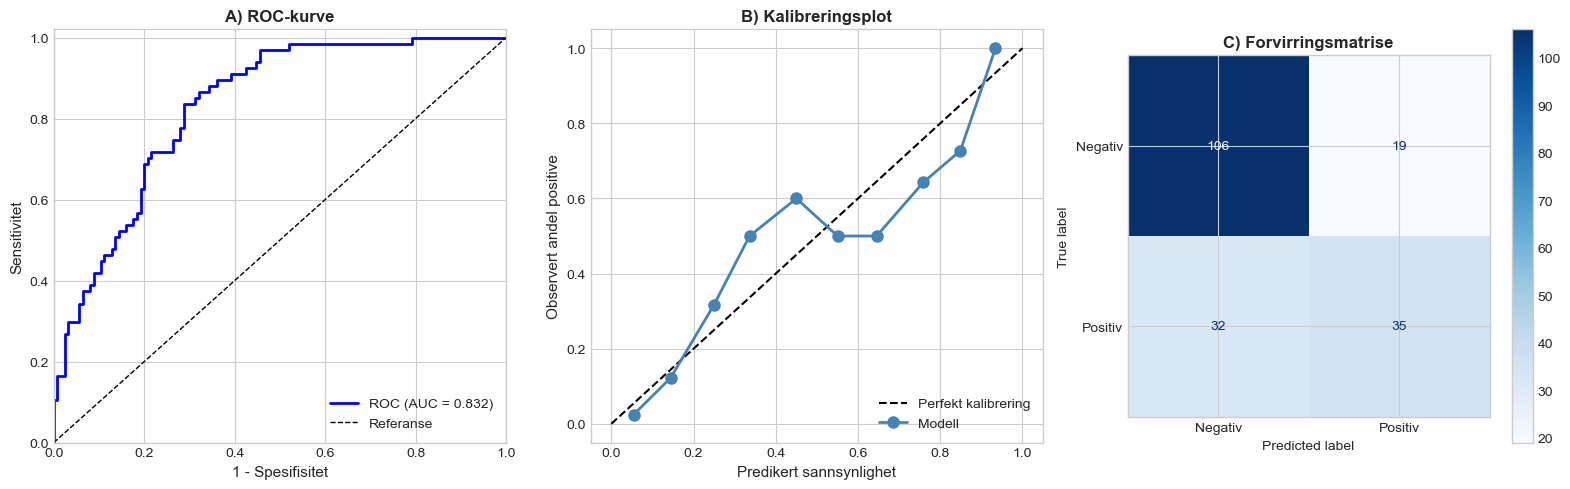

Figur lagret: figurer/publikasjon_figur.png (300 DPI)


In [12]:
# ============================================================================
# OPPGAVE 17: Publikasjonsklar grafikk
# ============================================================================

fig = plt.figure(figsize=(16, 5))

# 1. ROC-kurve
ax1 = fig.add_subplot(131)
fpr, tpr, _ = roc_curve(y_test, y_proba)
ax1.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC (AUC = {auc_score:.3f})')
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Referanse')
ax1.set_xlabel('1 - Spesifisitet', fontsize=11)
ax1.set_ylabel('Sensitivitet', fontsize=11)
ax1.set_title('A) ROC-kurve', fontsize=12, fontweight='bold')
ax1.legend(loc='lower right')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1.02])

# 2. Kalibreringsplot
ax2 = fig.add_subplot(132)
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
ax2.plot([0, 1], [0, 1], 'k--', label='Perfekt kalibrering')
ax2.plot(prob_pred, prob_true, 'o-', color='steelblue', linewidth=2, 
         markersize=8, label='Modell')
ax2.set_xlabel('Predikert sannsynlighet', fontsize=11)
ax2.set_ylabel('Observert andel positive', fontsize=11)
ax2.set_title('B) Kalibreringsplot', fontsize=12, fontweight='bold')
ax2.legend(loc='lower right')

# 3. Forvirringsmatrise
ax3 = fig.add_subplot(133)
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels=['Negativ', 'Positiv'],
    cmap='Blues',
    ax=ax3
)
ax3.set_title('C) Forvirringsmatrise', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('figurer/publikasjon_figur.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figur lagret: figurer/publikasjon_figur.png (300 DPI)")

### Oppgave 18: Metodeseksjon

Nedenfor er et eksempel pa en metodeseksjon som folger beste praksis:

---

**METODER**

*Studiepopulasjon og data:* Vi brukte Pima Indians Diabetes-datasettet (n=768) med kliniske malinger fra kvinner av Pima-indianerstammen.

*Prediktorvariabler:* Åtte variabler ble inkludert: antall graviditeter, glukosekonsentrasjon, diastolisk blodtrykk, triceps hudfold-tykkelse, seruminsulin, BMI, diabetes pedigree funksjon, og alder.

*Modellutvikling:* Data ble delt i treningssett (75%) og testsett (25%) med stratifisering. Treningsdata ble standardisert for modelltilpasning. Logistisk regresjon ble valgt som primarmodell.

*Modellevaluering:* Vi rapporterer AUC, sensitivitet, spesifisitet, PPV og NPV. Kalibrering ble vurdert med kalibreringsplot.

*Programvare:* Python 3.10 med scikit-learn.

---

---

# Oppsummering

Denne løsningsnotebooken har dekket:

## Del A: Oppgaver fra hovednotebooken
1. Dataoppdeling med valideringssett
2. Skalering med StandardScaler
3. Presisjon vs Recall - kliniske avveininger
4. Sammenligning av klassifikatorer
5. Forvirringsmatrise for Random Forest
6. Refleksjon om terskelvalg

## Del B: Tilleggsoppgaver
9-10. ROC-kurver og AUC<br>
11-12. Alternative modeller (RF, Gradient Boosting, MLP)<br>
13-14. Betydning av skalering<br>
15. Leave-One-Out kryssvalidering<br>
16-18. Rapportering etter best practices (TRIPOD)<br>

---

## Nøkkelbudskap

1. **Evaluer med flere metrikker** - Accuracy alene er misvisende
2. **Skaler data** - Spesielt for gradientbaserte modeller
3. **Velg riktig valideringsmetode** - K-fold for de fleste
4. **Begrune terskelvalg klinisk** - Avhenger av kontekst
5. **Rapporter med usikkerhet** - Konfidensintervaller er essensielle
6. **Folg TRIPOD** - For transparent og reproduserbar forskning